# Normal Equation

In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1)

In [3]:
y = 4+3*X+np.random.randn(100,1)

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use('ggplot')

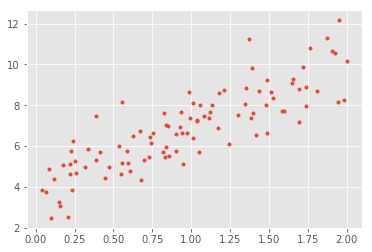

In [5]:
plt.plot(X,y,'.')

In [6]:
X_b = np.c_[np.ones((100,1)),X]

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()

In [9]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([ 3.90217448]), array([[ 3.06859812]]))

# Gradient Descent

## Batch Gradient Descent

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [12]:
theta = np.random.randn(2,1) # random initialization

In [13]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[ 3.90217448],
       [ 3.06859812]])

## Stochastic Gradient Descent

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [16]:
def learning_schedule(t):
    return t0/(t+t1)

In [17]:
theta = np.random.randn(2,1) # random initialization

In [18]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [19]:
theta

array([[ 3.93218568],
       [ 3.09477294]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/Users/vlu747/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.93328237]), array([ 3.10301379]))

## Mini-Batch Gradient Descent

# Polynomial Regression

In [22]:
#quadratic
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

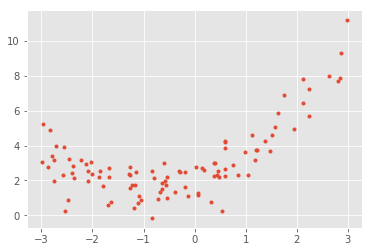

In [23]:
plt.plot(X,y,'.')

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [25]:
X_poly = poly_features.fit_transform(X)

In [26]:
X[0]

array([-2.38725694])

In [27]:
X_poly[0]

array([-2.38725694,  5.69899568])

In [28]:
#X_poly now contains the original feature of X plus the square of this feature
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.02108756]), array([[ 0.97400875,  0.51447679]]))

this estimates y = 0.52x^2+0.998x+1.93

# Learning Curves

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3, label='val')

In [31]:
lin_reg = LinearRegression()

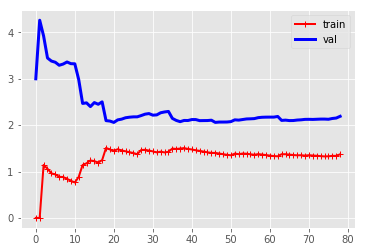

In [32]:
plot_learning_curves(lin_reg, X, y)
plt.legend()

This is underfitting: both curves have reached a plateau, and they are close and fairly high

In [35]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

(0, 3)

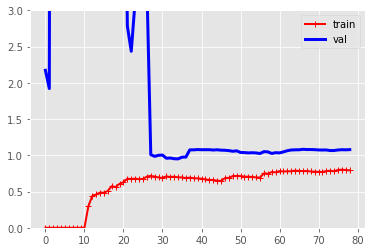

In [36]:
plot_learning_curves(polynomial_regression, X, y)
plt.legend()
plt.ylim([0,3])

# Regularized Linear Models

## Ridge Regression

In [37]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [38]:
from sklearn.linear_model import Ridge

In [41]:
ridge_reg = Ridge(alpha=1, solver = "cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.55071465]])

In [45]:
sgd_reg = SGDRegressor(penalty="l2", random_state=42)#it's l 2, not 12(number)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

/Users/vlu747/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 1.13500145])

In [47]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 1.5507201]])

## Lasso

In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])